## 한글 폰트 설치

In [1]:
# 코랩에서 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임>세션 다시 시작 클릭 후 코드 실행

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126380 files and direc

# **13차시: 데이터 전처리 종합**
## 🔍 **학습목표**
- 전체 데이터 전처리 흐름(탐색 → 정제 → 변환)을 통합적으로 수행할 수 있다.  
- 전처리 단계마다 어떤 처리 방법이 적절한지 판단할 수 있다.  
- 처리 결과를 해석하고, 의사결정에 필요한 분석적 사고를 기를 수 있다.

## 📂 데이터 파일

- 사용 파일: `온라인쇼핑몰_주문데이터.csv`

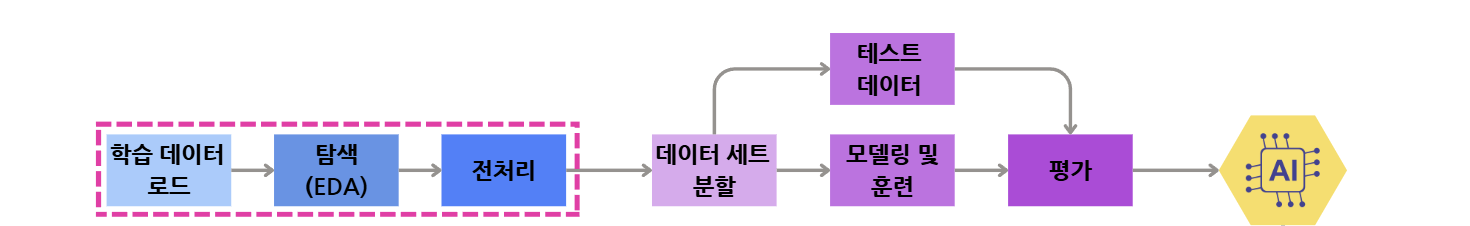

In [1]:
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

---

## **문제1. 아래의 지시대로 데이터를 분석하시오..**
- pandas 라이브러리를 별칭`pd`를 사용하여 임포트하시오.
- 데이터를 불러오고 변수 `df`에 저장하시오.
- 데이터 구조를 확인하고, 컬럼 수를 `답안01_1`에 저장하시오.  (답안01_1=5)
- 각 컬럼의 수치적 특성을 파악할 수 있는 통계 정보를 확인하고, 컬럼 `나이`의 중앙값을 `답안01_2`에 저장하시오.



In [2]:
# 여기에 코드를 작성하세요.
import pandas as pd

df=pd.read_csv('데이터세트/온라인쇼핑몰_배송완료예측.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문ID     891 non-null    object 
 1   배송완료여부   891 non-null    int64  
 2   고객등급     891 non-null    int64  
 3   고객명      891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   동시주문상품수  891 non-null    int64  
 7   쿠폰사용횟수   891 non-null    int64  
 8   주문번호     891 non-null    object 
 9   결제금액     891 non-null    int64  
 10  배송지코드    204 non-null    object 
 11  주문채널     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [5]:
df.describe()
df['나이'].median()

np.float64(28.0)

## **문제2.고객 중 가장 많은 금액을 지불한 사람은 누구인가?.**

- '결제금액' 컬럼을 기준으로 내림차순 정렬하시오.
    - df.sort_values() 사용
    - ascending=False

- 상위 5개 행을 출력하시오.

- 정렬된 결과에서 가장 첫 번째 고객의 고객등급을 답안02_1에 저장하시오.

- 해당 고객의 결제금액을 답안02_2에 저장하시오.

In [11]:
# 여기에 코드를 작성하세요.

descDF=df.sort_values(by='결제금액',ascending=False)
descDF.head(5)

,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
258,259,1,1,서서연,여성,35.0,0,0,ORD2024-000259,512000,NaN,모바일
679,680,1,1,이예린,남성,36.0,0,1,ORD2024-000680,512000,SEO-924,모바일
737,738,1,1,이현우,남성,35.0,0,0,ORD2024-000738,512000,GG-225,모바일
438,439,0,1,박서연,남성,64.0,1,4,ORD2024-000439,263000,GG-620,웹
27,28,0,1,최서연,남성,19.0,3,2,ORD2024-000028,263000,BS-279,웹


## **문제3.분석 과정 중 일부 고객의 정보가 누락되었음을 발견하였다.**

- 결측치가 존재하는 컬럼 수를 `답안03_1`에 저장하시오.  

- '주문채널' 컬럼의 결측치는 **최빈값**으로 대체하시오.  

- '나이' 컬럼의 결측치는 **중앙값**으로 대체하시오.  

- 결측치 처리 후 '주문채널' 컬럼의 **유일값 개수**를 `답안03_2`에 저장하시오.

In [21]:
# 여기에 코드를 작성하세요.
df.isnull().sum()

channel_mode=df['주문채널'].mode()[0]
df['주문채널']=df['주문채널'].fillna(channel_mode)

df['나이']=df['나이'].fillna( df['나이'].median() )

df

,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
0,1,0,3,이지훈,남성,22.0,1,0,ORD2024-000001,7000,NaN,웹
1,2,1,1,정하영,여성,38.0,1,0,ORD2024-000002,71000,SEO-850,모바일
2,3,1,3,최민수,여성,26.0,0,0,ORD2024-000003,8000,NaN,웹
3,4,1,1,이도윤,여성,35.0,1,0,ORD2024-000004,53000,BS-743,웹
4,5,0,3,이채원,남성,35.0,0,0,ORD2024-000005,8000,NaN,웹
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,조지아,남성,27.0,0,0,ORD2024-000887,13000,NaN,웹
887,888,1,1,김예린,여성,19.0,0,0,ORD2024-000888,30000,GG-616,웹
888,889,0,3,윤수빈,여성,28.0,1,2,ORD2024-000889,23000,NaN,웹
889,890,1,1,김현우,남성,26.0,0,0,ORD2024-000890,30000,GG-882,모바일


## **문제4.고객 일부의 결제금액이 비정상적으로 높게 나타난다.**

- '결제금액' 컬럼에 대해 seaborn의 boxplot으로 출력하시오.

- IQR 기준으로 이상치를 제거하고 `df_filtered`변수에 저장하시오.


<Axes: ylabel='결제금액'>

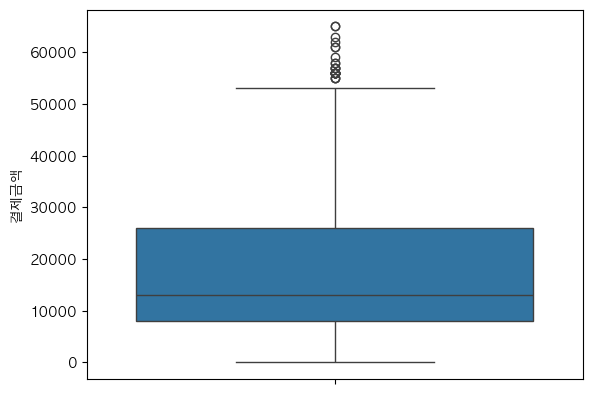

In [26]:
# 여기에 코드를 작성하세요.
import seaborn as sns

Q1=df['결제금액'].quantile(0.25)
Q3=df['결제금액'].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

cond= (df['결제금액'] >= lower) & (df['결제금액'] <= upper)
df_filtered=df[cond]

sns.boxplot(df_filtered['결제금액'])


## **문제5. 고객의 나이를 연령대로 구분하여 파생변수를 생성하자.**

마케팅팀은 고객을 연령대별로 나눠 캠페인을 기획하고자 한다.  
고객의 나이(`나이`)를 기준으로 명시적인 구간을 설정하여 `'연령대'` 파생변수를 생성하시오.

- `df_filtered.copy()`를 copy_df 변수에 저장해서 분석하시오.

- `pd.cut(컬럼,bins=[구간],labels=[구간이름])`을 사용하여 나이 구간을 다음과 같이 지정하시오:  
  - 0~29세: `'20대 이하'`  
  - 30~39세: `'30대'`  
  - 40~49세: `'40대'`  
  - 50세 이상: `'50대 이상'`  
- 구간 경계는 `[0, 30, 40, 50, 100]`으로 지정하시오.  
- 파생변수 컬럼 이름은 `'연령대'`로 지정하시오.  
- `'연령대'`가 `'30대'`인 고객 수를 `답안06`에 저장하시오.


In [14]:
# 여기에 코드를 작성하세요.

## **문제6. 머신러닝 모델이 범주형 데이터를 인식할 수 있도록 전처리합시다.**

모델 학습을 위해 원-핫 인코딩을 적용하되, 의미 없는 컬럼은 제거해야 한다.

- copy_df를 사용하시오.
- 분석 및 모델 훈련에 필요 없는 컬럼 `'고객명'`, `'주문ID'`, `'주문번호','배송지코드'`는 삭제하시오.  
- `'주문채널'`, `'성별', '연령대'` 컬럼에 대해 `get_dummies()`를 사용하여 **원-핫 인코딩**을 수행하고, `df_encoded` 변수에 저장하시오.
- **다중공선성 방지를 위해 `drop_first=True` 옵션**, **`dtype=int`** 를 적용하시오.  


다음 중 `'성별_여성'` 값이 0인 행에 대한 해석으로 옳은 것을 `답안06`에 저장하시오.

① 해당 고객은 여성이다.  
② 해당 고객은 성별 정보가 없다.  
③ 해당 고객은 남성이다.  
④ 해당 고객은 주문을 취소했다.




In [17]:
# 여기에 코드를 작성하세요.
cols_1 = ['고객명', '주문ID', '주문번호','배송지코드']
cols_2 = ['주문채널', '성별','연령대']

## **문제7. 수치형 변수들의 스케일 차이를 표준화하여 모델 학습을 용이하게 합시다.**
 각 수치형 변수의 값 범위가 달라,  
모델 학습 시 특정 변수의 영향력이 과도해지는 문제가 발생할 수 있다.  
따라서 수치형 변수들을 **표준화(StandardScaler)** 하여 같은 기준으로 맞추고자 한다.

- `df_encoded`를 사용하시오.  
- `StandardScaler`를 이용하여 수치형 변수들을 표준화하고,`df_scaled`에 데이터 프레임으로 저장하시오.



In [20]:
from sklearn.preprocessing import StandardScaler
# 여기에 코드를 작성하세요.

## **문제8. 변수 간의 상관관계를 시각화하여 분석 인사이트를 도출하자.**

데이터의 변수 간 연관성을 파악하여,  
모델 학습 전 변수 선택 또는 해석의 근거로 활용할 수 있다.

- `df_scaled`를 사용하시오.  
- `corr()` 함수를 사용하여 상관계수 행렬을 계산하시오.  
- `seaborn` 라이브러리의 `heatmap()`을 사용하여 **상관계수 히트맵**을 시각화하시오.  
- `heatmap()` 함수의 파라미터는 다음과 같이 설정하시오:
  - `annot=True` : 각 셀에 상관계수 수치 표시  
  - `fmt=".2f"` : 소숫점 둘째자리까지 표시  
  - `cmap="coolwarm"` : 컬러맵 설정  
  - `square=True` : 셀 정사각형 형태로 표시  
- 시각화 결과를 바탕으로 `'결제금액'`과 **가장 높은 상관관계**를 가진 변수를 `답안09`에 저장하시오.  
  (단, 자기 자신은 제외하고 판단)

In [23]:
# 여기에 코드를 작성하세요.
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

---

## 종합 코드

In [28]:
import pandas as pd
df = pd.read_csv('데이터세트/온라인쇼핑몰_배송완료예측.csv')

#### 데이터 분석 #########

#### 결측치 처리 #########
#'주문채널' 결측치 → 최빈값으로 대체
df['주문채널'] = df['주문채널'].fillna(df['주문채널'].mode()[0])

#'나이' 결측치 → 중앙값으로 대체
df['나이'] = df['나이'].fillna(df['나이'].median())


#### 이상치 처리 #########
# 이상치 기준 설정 (IQR)
q1 = df['결제금액'].quantile(0.25)
q3 = df['결제금액'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df_filtered = df[(df['결제금액'] >= lower) & (df['결제금액'] <= upper)]

#### 파생변수 추가 #########
copy_df = df_filtered.copy()
# 연령대 구간 및 라벨 정의
bins = [0, 30, 40, 50, 100]
labels = ['20대 이하', '30대', '40대', '50대 이상']

# cut을 이용한 연령대 파생변수 생성
copy_df['연령대'] = pd.cut(copy_df['나이'], bins=bins, labels=labels)


#### 불필요한 컬럼 제거 #########
df_07 = copy_df.drop(columns=['고객명', '주문ID', '주문번호','배송지코드'])

#### 인코딩 처리 #########
df_encoded = pd.get_dummies(df_07, columns=['주문채널', '성별','연령대'], drop_first=True, dtype=int)

#### 스케일링 처리 #########
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# 결과를 DataFrame으로 저장
df_scaled = pd.DataFrame(scaled_data,columns=df_encoded.columns)

df_scaled


,배송완료여부,고객등급,나이,동시주문상품수,쿠폰사용횟수,결제금액,주문채널_웹,주문채널_전화,성별_여성,연령대_30대,연령대_40대,연령대_50대 이상
0,-0.716709,0.708528,-0.528321,0.625606,-0.433718,-0.798557,0.571887,-0.327327,-0.677872,-0.444788,-0.320028,-0.256953
1,1.395266,0.708528,-0.215182,-0.486423,-0.433718,-0.724802,0.571887,-0.327327,1.475205,-0.444788,-0.320028,-0.256953
2,1.395266,-2.016580,0.489381,0.625606,-0.433718,2.594192,0.571887,-0.327327,1.475205,2.248263,-0.320028,-0.256953
3,-0.716709,0.708528,0.489381,-0.486423,-0.433718,-0.724802,0.571887,-0.327327,-0.677872,2.248263,-0.320028,-0.256953
4,-0.716709,0.708528,-0.058613,-0.486423,-0.433718,-0.724802,-1.748597,3.055050,-0.677872,-0.444788,-0.320028,-0.256953
...,...,...,...,...,...,...,...,...,...,...,...,...
770,-0.716709,-0.654026,-0.136897,-0.486423,-0.433718,-0.356025,0.571887,-0.327327,-0.677872,-0.444788,-0.320028,-0.256953
771,1.395266,-2.016580,-0.763176,-0.486423,-0.433718,0.897818,0.571887,-0.327327,1.475205,-0.444788,-0.320028,-0.256953
772,-0.716709,0.708528,-0.058613,0.625606,2.112733,0.381530,0.571887,-0.327327,1.475205,-0.444788,-0.320028,-0.256953
773,1.395266,-2.016580,-0.215182,-0.486423,-0.433718,0.897818,-1.748597,-0.327327,-0.677872,-0.444788,-0.320028,-0.256953
